#### First try
Simple copy-paste, so as to see if the code works in a notebook. 

In [ ]:
# From Python
# It requires OpenCV installed for Python
import sys
import cv2
import os
from sys import platform

# Remember to add your installation path here
# Option a
dir_path = os.path.dirname(os.path.realpath(__file__))
if platform == "win32": sys.path.append(dir_path + '/../../python/openpose/');
else: sys.path.append('../../python');
# Option b
# If you run `make install` (default path is `/usr/local/python` for Ubuntu), you can also access the OpenPose/python module from there. This will install OpenPose and the python library at your desired installation path. Ensure that this is in your python path in order to use it.
# sys.path.append('/usr/local/python')

# Parameters for OpenPose. Take a look at C++ OpenPose example for meaning of components. Ensure all below are filled
try:
    from openpose import *
except:
    raise Exception('Error: OpenPose library could not be found. Did you enable `BUILD_PYTHON` in CMake and have this Python script in the right folder?')
params = dict()
params["logging_level"] = 3
params["output_resolution"] = "-1x-1"
params["net_resolution"] = "-1x368"
params["model_pose"] = "BODY_25"
params["alpha_pose"] = 0.6
params["scale_gap"] = 0.3
params["scale_number"] = 1
params["render_threshold"] = 0.05
# If GPU version is built, and multiple GPUs are available, set the ID here
params["num_gpu_start"] = 0
params["disable_blending"] = False
# Ensure you point to the correct path where models are located
params["default_model_folder"] = dir_path + "/../../../models/"
# Construct OpenPose object allocates GPU memory
openpose = OpenPose(params)

while 1:
    # Read new image
    img = cv2.imread("../../../examples/media/COCO_val2014_000000000192.jpg")
    # Output keypoints and the image with the human skeleton blended on it
    keypoints, output_image = openpose.forward(img, True)
    # Print the human pose keypoints, i.e., a [#people x #keypoints x 3]-dimensional numpy object with the keypoints of all the people on that image
    print(keypoints)
    # Display the image
    cv2.imshow("output", output_image)
    cv2.waitKey(15)


Doesn't seem to work with a simple copy-paste, because a jupyter notebook can't know its own location. (why ? [StackoverFlow](https://stackoverflow.com/questions/39125532/file-does-not-exisit-in-jupyter-notebook), [Github Issue](https://github.com/ipython/ipython/issues/10123) )
I am going to try to hardcode the location of the things, see if it works better. That won't work on other machines, but portability is not my main concern right now. A small documentation should do it. 

Actually on the first try I will try to get the current working directory and put it in the 
```python
__file__
``` 
variable, to try and trick the script. 

In [ ]:
# From Python
# It requires OpenCV installed for Python
import sys
import cv2
import os
from sys import platform

In [ ]:
#try 1 get the current working directory
__file__ = os.getcwd()

# Remember to add your installation path here
# Option a
dir_path = os.path.dirname(os.path.realpath(__file__))
if platform == "win32": sys.path.append(dir_path + '/../../python/openpose/');
else: sys.path.append('../../python');
# Option b
# If you run `make install` (default path is `/usr/local/python` for Ubuntu), you can also access the OpenPose/python module from there. This will install OpenPose and the python library at your desired installation path. Ensure that this is in your python path in order to use it.
# sys.path.append('/usr/local/python')

# Parameters for OpenPose. Take a look at C++ OpenPose example for meaning of components. Ensure all below are filled
try:
    from openpose import *
except:
    raise Exception('Error: OpenPose library could not be found. Did you enable `BUILD_PYTHON` in CMake and have this Python script in the right folder?')
params = dict()
params["logging_level"] = 3
params["output_resolution"] = "-1x-1"
params["net_resolution"] = "-1x368"
params["model_pose"] = "BODY_25"
params["alpha_pose"] = 0.6
params["scale_gap"] = 0.3
params["scale_number"] = 1
params["render_threshold"] = 0.05
# If GPU version is built, and multiple GPUs are available, set the ID here
params["num_gpu_start"] = 0
params["disable_blending"] = False
# Ensure you point to the correct path where models are located
params["default_model_folder"] = dir_path + "/../../../models/"
# Construct OpenPose object allocates GPU memory
openpose = OpenPose(params)

while 1:
    # Read new image
    img = cv2.imread("../../../examples/media/COCO_val2014_000000000192.jpg")
    # Output keypoints and the image with the human skeleton blended on it
    keypoints, output_image = openpose.forward(img, True)
    # Print the human pose keypoints, i.e., a [#people x #keypoints x 3]-dimensional numpy object with the keypoints of all the people on that image
    print(keypoints)
    # Display the image
    cv2.imshow("output", output_image)
    cv2.waitKey(15)


Doesn't work. Will now try the hardcoding of the path. 

In [ ]:
#try 2: harcode the file
__file__ = os.path.realpath('C:/Users/Marku/Documents_no_sync/Projet_Bachelor/openpose/build/python/openpose/__init__.py')
sys.path.append(os.path.realpath('C:\\Users\\Marku\\Documents_no_sync\\Projet_Bachelor\\openpose\\build\\examples\\tutorial_api_python'))
# Remember to add your installation path here
# Option a
dir_path = os.path.dirname(os.path.realpath(__file__))
print(dir_path)
print(sys.path)
if platform == "win32": sys.path.append(dir_path + '/../../python/openpose/');
else: sys.path.append('../../python');
# Option b
# If you run `make install` (default path is `/usr/local/python` for Ubuntu), you can also access the OpenPose/python module from there. This will install OpenPose and the python library at your desired installation path. Ensure that this is in your python path in order to use it.
# sys.path.append('/usr/local/python')

# Parameters for OpenPose. Take a look at C++ OpenPose example for meaning of components. Ensure all below are filled
try:
    from openpose import *
except:
    raise Exception('Error: OpenPose library could not be found. Did you enable `BUILD_PYTHON` in CMake and have this Python script in the right folder?')
params = dict()
params["logging_level"] = 3
params["output_resolution"] = "-1x-1"
params["net_resolution"] = "-1x368"
params["model_pose"] = "BODY_25"
params["alpha_pose"] = 0.6
params["scale_gap"] = 0.3
params["scale_number"] = 1
params["render_threshold"] = 0.05
# If GPU version is built, and multiple GPUs are available, set the ID here
params["num_gpu_start"] = 0
params["disable_blending"] = False
# Ensure you point to the correct path where models are located
params["default_model_folder"] = dir_path + "/../../../models/"
# Construct OpenPose object allocates GPU memory
openpose = OpenPose(params)


#while 1:
#    # Read new image
#    img = cv2.imread("../../../examples/media/COCO_val2014_000000000192.jpg")
    # Output keypoints and the image with the human skeleton blended on it
#    keypoints, output_image = openpose.forward(img, True)
    # Print the human pose keypoints, i.e., a [#people x #keypoints x 3]-dimensional numpy object with the keypoints of all the people on that image
#    print(keypoints)
    # Display the image
#    cv2.imshow("output", output_image)
#    cv2.waitKey(15)


Not sure why, but now it works ! Now there is only a slight inconvenient such as to stop it, but hey, here it is ! Maybe remove the while loop to only show the image once ? Works.

In [ ]:
# Read new image
img = cv2.imread("../../../examples/media/COCO_val2014_000000000192.jpg")
# Output keypoints and the image with the human skeleton blended on it
keypoints, output_image = openpose.forward(img, True)
# Print the human pose keypoints, i.e., a [#people x #keypoints x 3]-dimensional numpy object with the keypoints of all the people on that image
print(keypoints)
# Display the image
cv2.imshow("output", output_image)
cv2.waitKey(15)

Problem is now to try and display the image directly in the jupyter notebook. Maybe matplolib can help ?

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
# Read new image
img = cv2.imread("../../../examples/media/COCO_val2014_000000000192.jpg")
# Output keypoints and the image with the human skeleton blended on it
keypoints, output_image = openpose.forward(img, True)
# Print the human pose keypoints, i.e., a [#people x #keypoints x 3]-dimensional numpy object with the keypoints of all the people on that image
#print(keypoints)
RGB_im = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

plt.imshow(RGB_im)
plt.show()

# Display the image
#cv2.imshow("output", output_image)
#cv2.waitKey(15)

Matplot lib expects img in RGB format but OpenCV provides it in BGR. Hence a small conversion is [needed](Matplot lib expects img in RGB format but OpenCV provides it in BGR.).

## Clean cells to run for demo

In [1]:
#Imports and preparation for OpenPose

import sys
import cv2
import os
from sys import platform
%matplotlib inline
from matplotlib import pyplot as plt


__file__ = os.path.realpath('C:/Users/Marku/Documents_no_sync/Projet_Bachelor/openpose/build/python/openpose/__init__.py')
sys.path.append(os.path.realpath('C:\\Users\\Marku\\Documents_no_sync\\Projet_Bachelor\\openpose\\build\\examples\\tutorial_api_python'))
dir_path = os.path.dirname(os.path.realpath(__file__))
if platform == "win32": sys.path.append(dir_path + '/../../python/openpose/');
else: sys.path.append('../../python');

try:
    from openpose import *
except:
    raise Exception('Error: OpenPose library could not be found. Did you enable `BUILD_PYTHON` in CMake and have this Python script in the right folder?')
params = dict()
params["logging_level"] = 3
params["output_resolution"] = "-1x-1"
params["net_resolution"] = "-1x368"
params["model_pose"] = "BODY_25"
params["alpha_pose"] = 0.6
params["scale_gap"] = 0.3
params["scale_number"] = 1
params["render_threshold"] = 0.05
# If GPU version is built, and multiple GPUs are available, set the ID here
params["num_gpu_start"] = 0
params["disable_blending"] = False
# Ensure you point to the correct path where models are located
params["default_model_folder"] = dir_path + "/../../../models/"
# Construct OpenPose object allocates GPU memory
openpose = OpenPose(params)

print("Imports and start of openpose success !")

Imports and start of openpose success !


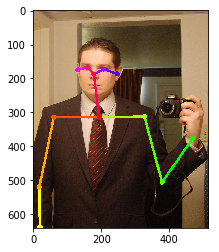

In [2]:
#image selection, processing, and display

# Read new image
img = cv2.imread("../../../examples/media/COCO_val2014_000000000459.jpg")

# Output keypoints and the image with the human skeleton blended on it
keypoints, output_image = openpose.forward(img, True)

#conversion for plt to understand the encoding of the image
RGB_im = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(RGB_im)
plt.show()